<a href="https://colab.research.google.com/github/jeraldflowers/Multinomial-logistic-regression/blob/main/Multinomial_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multinomial Logistic Regression

## Import libraries

In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

## Data Load

In [2]:
df = pd.read_csv('/content/Dry_Bean.csv')

In [3]:
df.head(5)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [4]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [5]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

At first glance it appears that there are no outliers or null values.

## Drop duplicates

In [6]:
df.drop_duplicates(inplace=True)


If we have duplicate data, with this we no longer have them.

## Null Data Handling

We analyze the null values:

In [7]:
df.isnull().sum()


Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

We note that we have no null values.

## Undersampling

Logistic regression is handled much better if we have our datasets balanced. We'll see how ours is:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


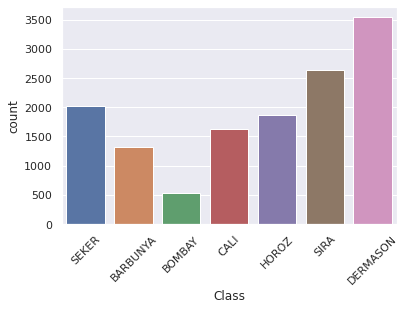

In [9]:
sns.countplot(df.Class)
plt.xticks(rotation=45)
plt.show()


We see that we do not have the same number of examples for all classes. There are classes with too many examples like "DERMASON" and too few like "BOMBAY". This will considerably affect the performance of our logistic regression, because it will learn much better to predict values of the DERMASSON class compared to the others.

In [10]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)

In [11]:
X = df.drop("Class", axis=1)
y = df.Class

In [12]:
X_over, y_over = undersample.fit_resample(X, y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


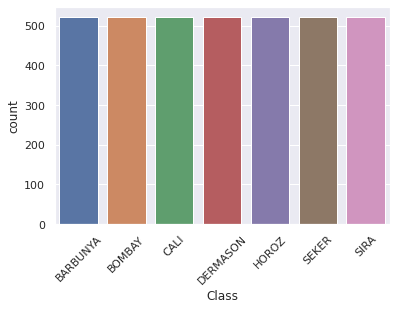

In [13]:
sns.countplot(y_over)
plt.xticks(rotation=45)
plt.show()

Here what we did is an "Undersampling", which means reducing the amount of all the data to the amount of the minimum class. We observe that all remain with the same amount and fully balanced to facilitate the work.

In [14]:
df.shape

(13543, 17)

In [15]:
X_over.shape

(3654, 16)

We went from 13,543 examples to 3,654. It is not optimal, but it is the way to work with unbalanced datasets. We could run two risks, generate data that was not real or lose data in our case. But even so we have enough data to be able to do the logistic regression.

## Conversion to numerics

In [16]:
list(np.unique(y_over))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [18]:
y_over.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [1,2,3,4,5,6,7], inplace=True)

In [19]:
list(np.unique(y_over))

[1, 2, 3, 4, 5, 6, 7]

## Exploratory Data Analysis

### Correlations

We will do a correlation analysis. Remember that highly related variables can affect the performance of our model.

In [20]:
df_dea = X_over
df_dea['Class'] = y_over

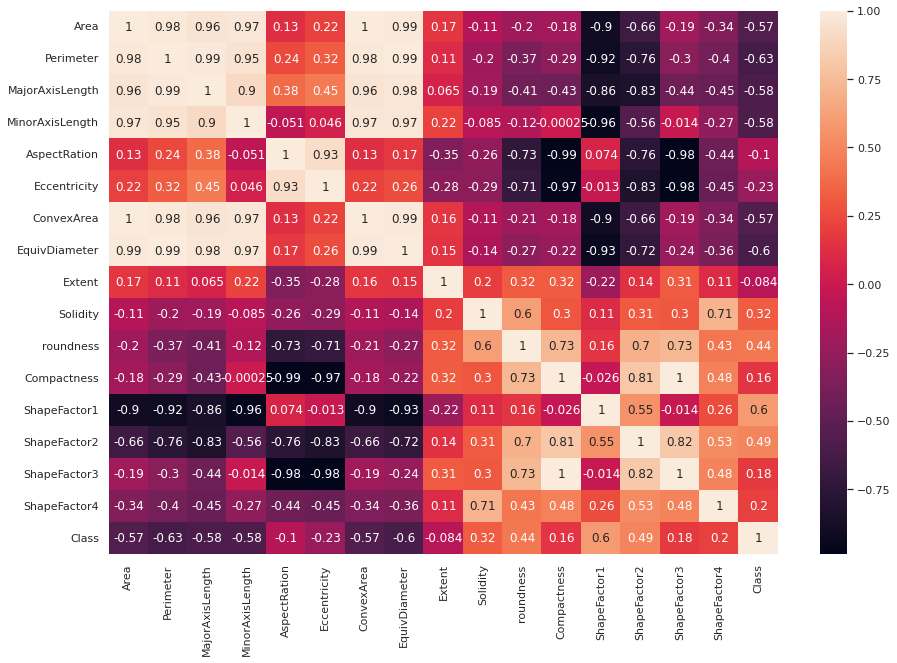

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dea.corr(), annot=True)
plt.show()

We know that the correlation goes from -1 to 1. Being 1 highly correlated, -1 inversely correlated and values close to zero mean that they have no correlation at all.

We observe that there are two variables that are highly correlated so that they do not affect. Prior to this we must have a knowledge of the business and understand our dataset before understanding this.

In [23]:
X_over.drop(['ConvexArea', 'EquivDiameter'], axis=1, inplace=True)

We eliminate the variables of "ConvexArea" and "EquivDiameter".

## Data Display

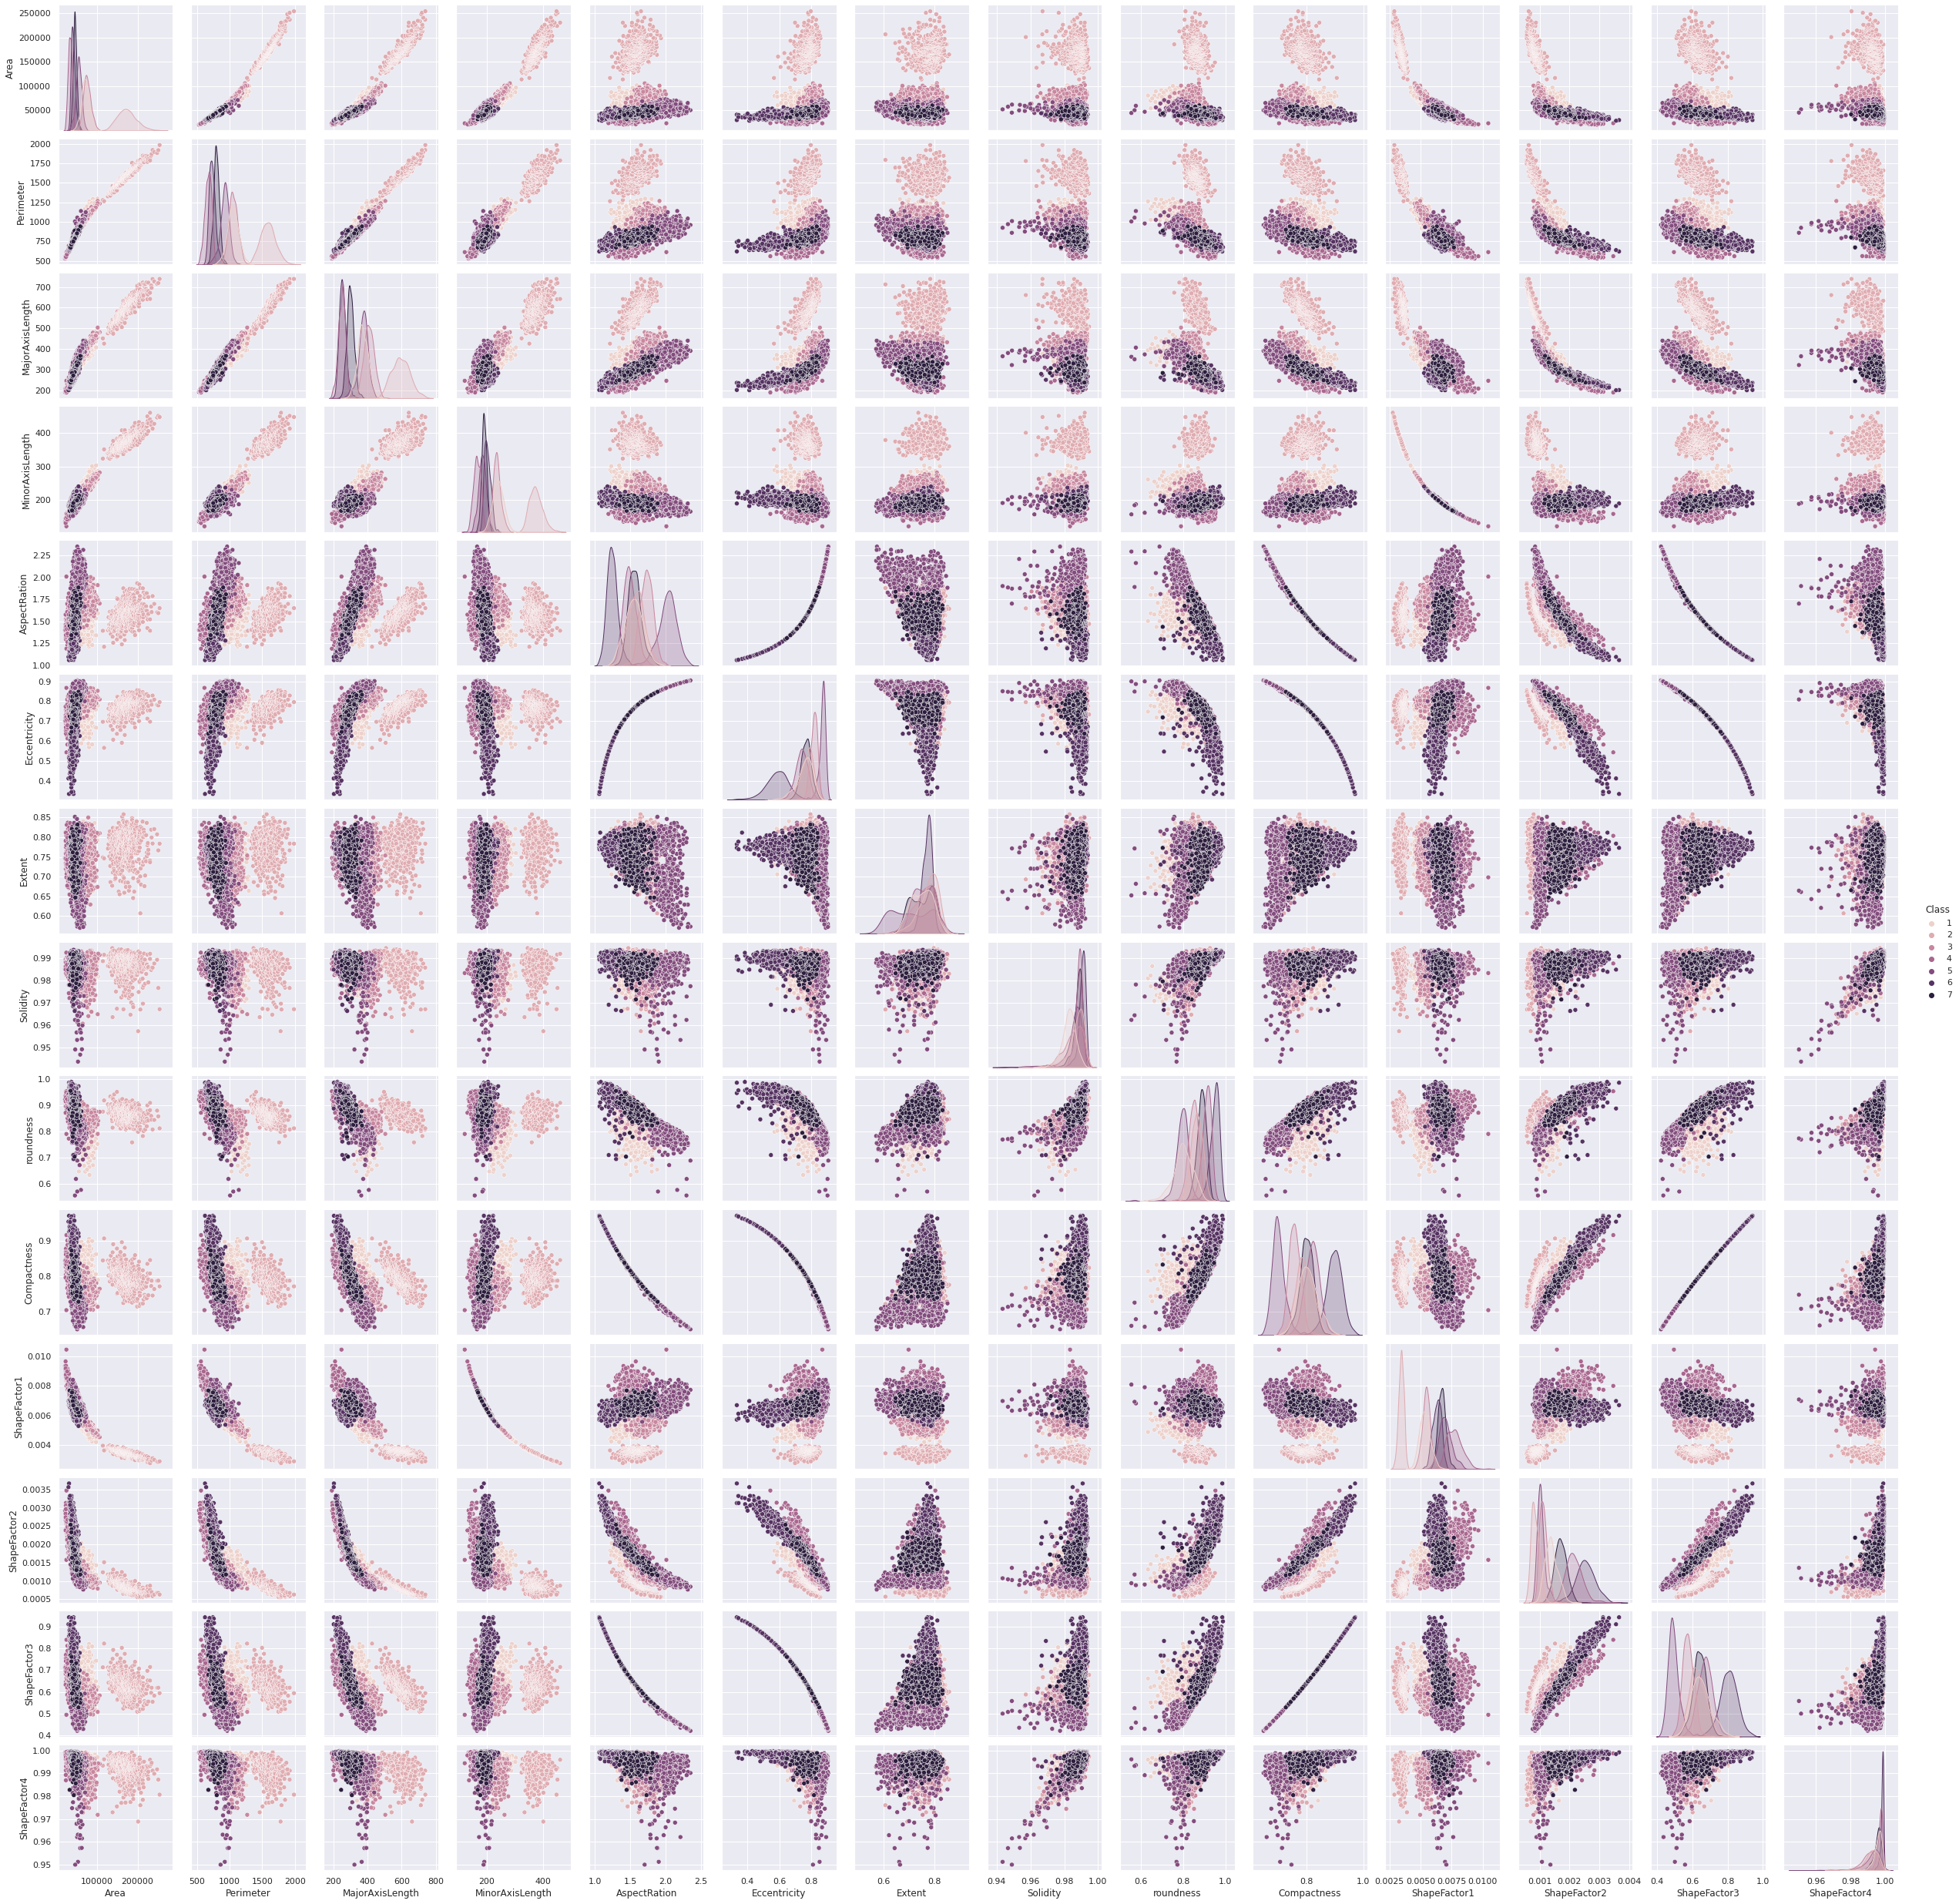

In [24]:
sns.pairplot(df_dea, hue='Class')

Here we look at a scatterplot of all variables against all variables to see the distribution of the data. Yes we can classify them because with the naked eye you see certain distributions over certain areas in which they are highly classifiable.

## Split and Data Scaling

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state=42, shuffle=True, test_size= .2)

In [27]:
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

## Multiclass Model

We are going to create our logistic regression model with the following function:

In [28]:
def logistic_model(C_, solver_, multiclass_):
  logistic_regression_model = LogisticRegression(random_state=42, solver=solver_, multi_class=multiclass_, n_jobs=-1, C=C_)
  return logistic_regression_model

In [29]:
model = logistic_model(1, 'saga', 'multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[128   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0]
 [  0   0 102   1   0   0   0]
 [  0   0   0 105   0   0   0]
 [  0   0   1   1  94   0   0]
 [  0   0   0   0   0  89   2]
 [  0   0   0   0   0   0 110]]
0.9931600547195623


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


We note that we have an accuracy of approximately 99%. But we don't know if it's the best accuracy we can get.

In [31]:
multiclass = ['ovr', 'multinomial']
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scores = []
params=[]
for i in multiclass:
  for j in solver_list:
    try:
      model = logistic_model(1, j, i)
      model.fit(X_train, y_train)
      predictions = model.predict(X_test)
      params.append(i + '-' + j)
      accuracy = accuracy_score(y_test, predictions)
      scores.append(accuracy)
    except:
      None


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_i

## Evaluation of Results

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

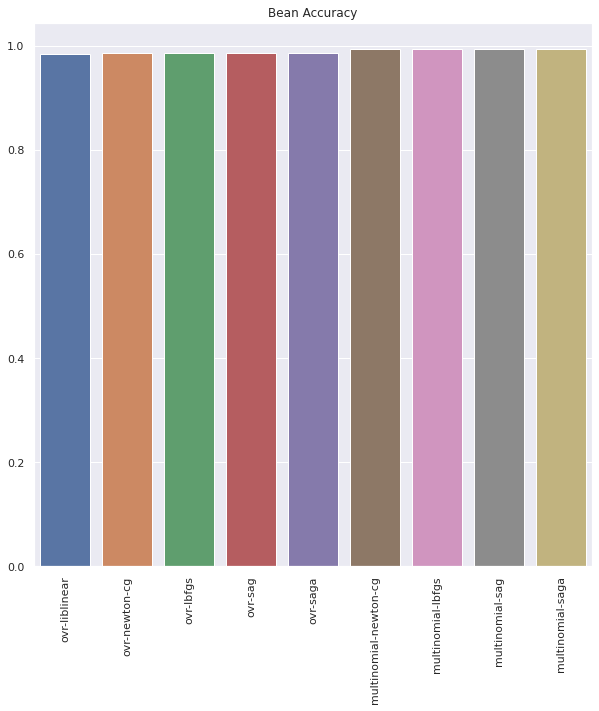

In [34]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x=params, y=scores).set_title("Bean Accuracy")
plt.xticks(rotation=90)

We realize that the vast majority of data have an accuracy very close to 1, which shows that the logistic regression was able to correctly classify our data. We have good results due to the previous cleaning of the data that we did and the standardization of the data. 

In [35]:
model = logistic_model(1, 'newton-cg', 'multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[128   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0]
 [  0   0 102   1   0   0   0]
 [  0   0   0 105   0   0   0]
 [  0   0   1   1  94   0   0]
 [  0   0   0   0   0  90   1]
 [  0   0   0   0   0   0 110]]
0.9945280437756497


We use "newton_cg" and "multinomial" to make the prediction. We get an accuracy of 99.4% which is very close to one. And we see in our confusion matrix that he was only wrong four times, which is pretty good for our regression.

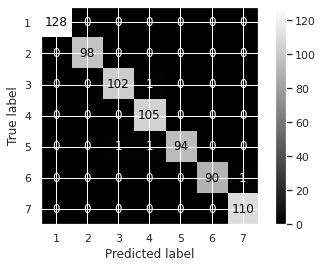

In [37]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

We use the confusion matrix and in this graph we notice the prediction level much more clearly.